In [29]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime, timedelta
import sys
## For SDK
import getpass
from odp_sdk import ODPClient
from getpass import getpass
sys.path.append('/Users/tarabaris/GitHub/odp-sdk-python/Examples')
from UtilityFunctions import *
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [11]:
## This code will prompt you to enter your API key to connect
client = ODPClient(api_key=getpass(prompt='Insert your personal ODP API key:'), 
                       project="odp", client_name="odp")

Insert your personal ODP API key:········


INFO:odp-sdk.log:Connected
INFO:odp-sdk.log:Logged in to 'odp' as user 'Tara.Baris@oceandata.earth'


# Option 1: Download all data from geospatial region and timespan


In [12]:
longitude= [0,15]
latitude = [50,65]

df1=client.casts(longitude,
                latitude,
                timespan=['2018-07-01','2018-07-15'])
df1.head()

INFO:odp-sdk.log:Locating available casts..
INFO:odp-sdk.log:-> 449 casts found
INFO:odp-sdk.log:Downloading data from casts..
INFO:odp-sdk.log:-> 34659 data rows downloaded in 7.43s


,date,lat,lon,z,z_WODflag,z_origflag,Oxygen,Oxygen_WODflag,Oxygen_origflag,Temperature,Temperature_WODflag,Temperature_origflag,Salinity,Salinity_WODflag,Salinity_origflag,Chlorophyll,Chlorophyll_WODflag,Chlorophyll_origflag,Pressure,Pressure_WODflag,Pressure_origflag,Nitrate,Nitrate_WODflag,Nitrate_origflag,pH,pH_WODflag,pH_origflag,Phosphate,Phosphate_WODflag,Phosphate_origflag,Silicate,Silicate_WODflag,Silicate_origflag,Alkalinity,Alkalinity_WODflag,Alkalinity_origflag,externalId,datetime,plankton,plankton_WODflag,plankton_origflag
0,20180708,52.712833,1.760667,2.973534,0,NaN,NaN,NaN,NaN,16.602001,0.0,NaN,33.848,0.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32723_19427951,2018-07-08,NaN,NaN,NaN
1,20180708,52.712833,1.760667,3.964702,0,NaN,NaN,NaN,NaN,16.605000,0.0,NaN,33.848,0.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32723_19427951,2018-07-08,NaN,NaN,NaN
2,20180708,52.712833,1.760667,4.955866,0,NaN,NaN,NaN,NaN,16.606001,0.0,NaN,33.848,0.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32723_19427951,2018-07-08,NaN,NaN,NaN
3,20180708,52.712833,1.760667,5.947024,0,NaN,NaN,NaN,NaN,16.607000,0.0,NaN,33.848,0.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32723_19427951,2018-07-08,NaN,NaN,NaN
4,20180708,52.712833,1.760667,6.938179,0,NaN,NaN,NaN,NaN,16.607000,0.0,NaN,33.848,0.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32723_19427951,2018-07-08,NaN,NaN,NaN


In [13]:
df1.columns

Index(['date', 'lat', 'lon', 'z', 'z_WODflag', 'z_origflag', 'Oxygen',
       'Oxygen_WODflag', 'Oxygen_origflag', 'Temperature',
       'Temperature_WODflag', 'Temperature_origflag', 'Salinity',
       'Salinity_WODflag', 'Salinity_origflag', 'Chlorophyll',
       'Chlorophyll_WODflag', 'Chlorophyll_origflag', 'Pressure',
       'Pressure_WODflag', 'Pressure_origflag', 'Nitrate', 'Nitrate_WODflag',
       'Nitrate_origflag', 'pH', 'pH_WODflag', 'pH_origflag', 'Phosphate',
       'Phosphate_WODflag', 'Phosphate_origflag', 'Silicate',
       'Silicate_WODflag', 'Silicate_origflag', 'Alkalinity',
       'Alkalinity_WODflag', 'Alkalinity_origflag', 'externalId', 'datetime',
       'plankton', 'plankton_WODflag', 'plankton_origflag'],
      dtype='object')

# Option 2: Download data from geospatial region and timespan, specify parameters, and whether you want to include flagged data

In [24]:
df2=client.casts(longitude,
                latitude,
                timespan=['2018-07-01','2018-07-15'],
                parameters=['lat', 'lon', 'z', 'date', 'Temperature', 'Oxygen'],
                include_flagged_data=False) 
df2.head()

INFO:odp-sdk.log:Locating available casts..
INFO:odp-sdk.log:-> 449 casts found
INFO:odp-sdk.log:Downloading data from casts..
INFO:odp-sdk.log:-> 34659 data rows downloaded in 7.50s


,externalId,datetime,lat,lon,z,date,Temperature,Oxygen
0,cast_wod_3_2018_32723_19427951,2018-07-08,52.712833,1.760667,2.973534,20180708,16.602001,NaN
1,cast_wod_3_2018_32723_19427951,2018-07-08,52.712833,1.760667,3.964702,20180708,16.605000,NaN
2,cast_wod_3_2018_32723_19427951,2018-07-08,52.712833,1.760667,4.955866,20180708,16.606001,NaN
3,cast_wod_3_2018_32723_19427951,2018-07-08,52.712833,1.760667,5.947024,20180708,16.607000,NaN
4,cast_wod_3_2018_32723_19427951,2018-07-08,52.712833,1.760667,6.938179,20180708,16.607000,NaN


In [21]:
client.casts??

# Option 3: only get data for specific research country/platform/equipment etc. 
Get data collected by Norway

In [16]:
casts=client.get_available_casts(longitude,
                                latitude,
                                timespan=['2018-01-01','2018-12-31'])


casts.head()

,index,level,geo_index,geo_long,geo_lat,geo_key,extId,prefix,owner,equipment,castYear,castSize,parent_seq_name,WOD_cruise_name,dataset_code,lat,lon,time,country,WOD_cruise_identifier,originators_cruise_identifier,wod_unique_cast,date,GMT_time,Access_no,Platform,Institute,Cast_Tow_number,Orig_Stat_Num,Bottom_Depth,Cast_Direction,High_res_pair,dataset,Recorder,real_time,dbase_orig,origflagset,z_first,z_last,Oxygen_first,Oxygen_last,Temperature_first,Temperature_last,Salinity_first,Salinity_last,Chlorophyll_first,Chlorophyll_last,Pressure_first,Pressure_last,Nitrate_first,Nitrate_last,pH_first,pH_last,Phosphate_first,Phosphate_last,Silicate_first,Silicate_last,Alkalinity_first,Alkalinity_last,plankton_first,plankton_last,datetime
37,0,level_3,32541,1,51,N51_E1,cast_wod_3_2018_32541_19037986,WOD,NaN,"ARGOS communications, sampling on down transit",2018,35,cast_wod_2_2018_32541,WOD cruise name not found,ctd,50.532000,0.856000,90862.4645833075,FRANCE,FR016645,FNFP,19037986,20181010,11.15,177041.0,THALASSA (Call sign FNFP; built 12/1995; IMO90...,NaN,NaN,3476035.0,NaN,DOWN,NaN,CTD,"ARGOS communications, sampling on down transit",real-time data,GTSP Program,NaN,1.0,36.0,NaN,NaN,16.99,16.98,34.84,34.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-10
38,1,level_3,32541,1,51,N51_E1,cast_wod_3_2018_32541_19037840,WOD,NaN,"ARGOS communications, sampling on down transit",2018,9,cast_wod_2_2018_32541,WOD cruise name not found,ctd,50.809000,0.583000,90859.25486111641,FRANCE,FR016645,FNFP,19037840,20181007,6.116667,176872.0,THALASSA (Call sign FNFP; built 12/1995; IMO90...,NaN,NaN,3429110.0,NaN,DOWN,NaN,CTD,"ARGOS communications, sampling on down transit",real-time data,GTSP Program,NaN,2.0,10.0,NaN,NaN,16.3,16.31,35.15,35.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-07
39,2,level_3,32541,1,50,N50_E1,cast_wod_3_2018_32541_18650497,WOD,NaN,CTD,2018,66,cast_wod_2_2018_32541,WOD cruise name not found,ctd,50.118500,0.802500,90603.1208333373,FRANCE,FR016418,FNFP,18650497,20180124,2.9,175327.0,THALASSA (Call sign FNFP; built 12/1995; IMO90...,NaN,NaN,NaN,NaN,NaN,NaN,CTD,NaN,NaN,ICES (International Council for the Exploratio...,NaN,1.4871196,33.90364,253.1417,257.4987,9.235999,9.332,34.45,34.704,NaN,NaN,1.5,34.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24
40,3,level_3,32541,0,51,N51_E0,cast_wod_3_2018_32541_18650503,WOD,NaN,CTD,2018,97,cast_wod_2_2018_32541,WOD cruise name not found,ctd,50.535835,0.334833,90603.68472218513,FRANCE,FR016418,FNFP,18650503,20180124,16.433332,175327.0,THALASSA (Call sign FNFP; built 12/1995; IMO90...,NaN,NaN,NaN,NaN,NaN,NaN,CTD,NaN,NaN,ICES (International Council for the Exploratio...,NaN,0.99137664,48.86915,256.6273,260.54858,10.183001,10.191,35.339,35.34,NaN,NaN,1.0,49.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-24
41,4,level_3,32541,0,50,N50_E0,cast_wod_3_2018_32541_18650507,WOD,NaN,CTD,2018,92,cast_wod_2_2018_32541,WOD cruise name not found,ctd,50.168000,0.197167,90604.01319444459,FRANCE,FR016418,FNFP,18650507,20180125,0.31666666,175327.0,THALASSA (Call sign FNFP; built 12/1995; IMO90...,NaN,NaN,NaN,NaN,NaN,NaN,CTD,NaN,NaN,ICES (International Council for the Exploratio...,NaN,0.9914097,46.392822,251.83461,252.2703,10.1310005,10.139,35.248,35.249,NaN,NaN,1.0,46.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-25


In [17]:
casts_norway = casts[casts.country=='NORWAY']
casts_norway.head()

,index,level,geo_index,geo_long,geo_lat,geo_key,extId,prefix,owner,equipment,castYear,castSize,parent_seq_name,WOD_cruise_name,dataset_code,lat,lon,time,country,WOD_cruise_identifier,originators_cruise_identifier,wod_unique_cast,date,GMT_time,Access_no,Platform,Institute,Cast_Tow_number,Orig_Stat_Num,Bottom_Depth,Cast_Direction,High_res_pair,dataset,Recorder,real_time,dbase_orig,origflagset,z_first,z_last,Oxygen_first,Oxygen_last,Temperature_first,Temperature_last,Salinity_first,Salinity_last,Chlorophyll_first,Chlorophyll_last,Pressure_first,Pressure_last,Nitrate_first,Nitrate_last,pH_first,pH_last,Phosphate_first,Phosphate_last,Silicate_first,Silicate_last,Alkalinity_first,Alkalinity_last,plankton_first,plankton_last,datetime
4457,20,level_3,32547,1,57,N57_E1,cast_wod_3_2018_32547_19272511,WOD,NaN,CTD,2018,83,cast_wod_2_2018_32547,WOD cruise name not found,ctd,56.999832,0.666500,90781.77361112833,NORWAY,NO005624,NaN,19272511,20180721,18.566668,187717.0,KRISTINE BONNEVIE (RV;c.s.LGWS;b.1993;ex.Dr.Fr...,NaN,NaN,NaN,90.0,NaN,NaN,CTD,NaN,NaN,ICES (International Council for the Exploratio...,NaN,0.99081373,82.22119,NaN,NaN,16.783,6.525,34.9165,34.9548,NaN,NaN,1.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-21
4479,42,level_3,32547,0,57,N57_E0,cast_wod_3_2018_32547_19272510,WOD,NaN,CTD,2018,77,cast_wod_2_2018_32547,WOD cruise name not found,ctd,56.999832,0.233000,90781.69513887167,NORWAY,NO005624,NaN,19272510,20180721,16.683332,187717.0,KRISTINE BONNEVIE (RV;c.s.LGWS;b.1993;ex.Dr.Fr...,NaN,NaN,NaN,81.0,NaN,NaN,CTD,NaN,NaN,ICES (International Council for the Exploratio...,NaN,0.99081373,76.2786,NaN,NaN,17.365,7.006,34.838303,34.8619,NaN,NaN,1.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-21
4887,394,level_3,32727,1,57,N57_E1,cast_wod_3_2018_32727_19272512,WOD,NaN,CTD,2018,75,cast_wod_2_2018_32727,WOD cruise name not found,ctd,57.000000,1.132500,90781.8659722209,NORWAY,NO005624,NaN,19272512,20180721,20.783333,187717.0,KRISTINE BONNEVIE (RV;c.s.LGWS;b.1993;ex.Dr.Fr...,NaN,NaN,NaN,83.0,NaN,NaN,CTD,NaN,NaN,ICES (International Council for the Exploratio...,NaN,1.9816228,75.28815,NaN,NaN,16.907,6.369,35.0142,35.0423,NaN,NaN,2.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-21
5732,6,level_3,32907,2,57,N57_E2,cast_wod_3_2018_32907_19272227,WOD,NaN,CTD,2018,75,cast_wod_2_2018_32907,WOD cruise name not found,ctd,56.640835,2.000500,90764.39652776718,NORWAY,NO005626,NaN,19272227,20180704,9.516666,187717.0,JOHAN HJORT (R/V;call sign LDGJ; built 1990; I...,NaN,NaN,NaN,86.0,NaN,NaN,CTD,NaN,NaN,ICES (International Council for the Exploratio...,NaN,3.9633467,77.2714,NaN,NaN,14.874,6.262,35.1109,35.0896,NaN,NaN,4.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-04
6527,801,level_3,32907,3,57,N57_E3,cast_wod_3_2018_32907_19272230,WOD,NaN,CTD,2018,62,cast_wod_2_2018_32907,WOD cruise name not found,ctd,56.889330,2.838333,90764.62708336115,NORWAY,NO005626,NaN,19272230,20180704,15.05,187717.0,JOHAN HJORT (R/V;call sign LDGJ; built 1990; I...,NaN,NaN,NaN,69.0,NaN,NaN,CTD,NaN,NaN,ICES (International Council for the Exploratio...,NaN,3.9632628,64.39349,NaN,NaN,15.0,6.3050003,35.0491,35.086597,NaN,NaN,4.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-04


In [18]:
data_norway = client.download_data_from_casts(casts_norway.extId.tolist(),n_threads=35)

data_norway.head()

,date,lat,lon,z,z_WODflag,z_origflag,Oxygen,Oxygen_WODflag,Oxygen_origflag,Temperature,Temperature_WODflag,Temperature_origflag,Salinity,Salinity_WODflag,Salinity_origflag,Chlorophyll,Chlorophyll_WODflag,Chlorophyll_origflag,Pressure,Pressure_WODflag,Pressure_origflag,Nitrate,Nitrate_WODflag,Nitrate_origflag,pH,pH_WODflag,pH_origflag,Phosphate,Phosphate_WODflag,Phosphate_origflag,Silicate,Silicate_WODflag,Silicate_origflag,Alkalinity,Alkalinity_WODflag,Alkalinity_origflag,externalId,datetime,plankton,plankton_WODflag,plankton_origflag
0,20180721,56.999832,0.6665,0.990814,0,NaN,NaN,NaN,NaN,16.783001,0,NaN,34.916500,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32547_19272511,2018-07-21,NaN,NaN,NaN
1,20180721,56.999832,0.6665,1.981623,0,NaN,NaN,NaN,NaN,16.799002,0,NaN,34.929199,0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32547_19272511,2018-07-21,NaN,NaN,NaN
2,20180721,56.999832,0.6665,2.972427,0,NaN,NaN,NaN,NaN,16.962000,0,NaN,34.921303,0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32547_19272511,2018-07-21,NaN,NaN,NaN
3,20180721,56.999832,0.6665,3.963226,0,NaN,NaN,NaN,NaN,16.829000,0,NaN,34.922199,0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32547_19272511,2018-07-21,NaN,NaN,NaN
4,20180721,56.999832,0.6665,4.954021,0,NaN,NaN,NaN,NaN,16.743000,0,NaN,34.923401,0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cast_wod_3_2018_32547_19272511,2018-07-21,NaN,NaN,NaN


# Plot temperature data

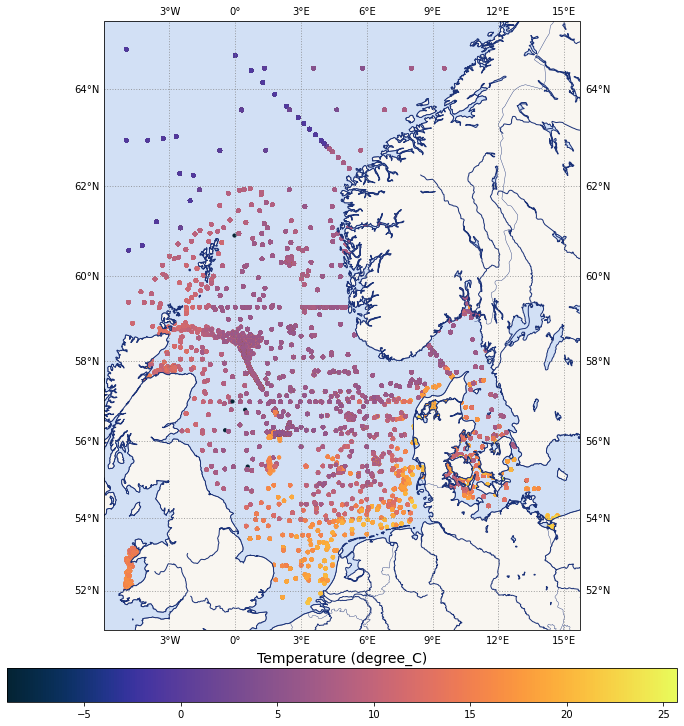

In [4]:
plot_casts('Temperature', df, longitude, latitude,  cmap=cmocean.cm.thermal)

# Plot interpolated Temperature


In [5]:
df_int=interpolate_casts_to_z(df,'Temperature',[5]) # Interpolate all profiles to 5m depth. OBS: This one may take a long time

In [6]:
##need to drop null values
df_int.dropna(inplace=True)

df_int['unixtime']=df_int['datetime'].apply(lambda x : x.value) 

points=df_int[['lon','lat','unixtime']].values.astype('float')
values=df_int['Temperature'].values .astype('float')

# Interpolating to a grid for the date '2018-07-14'
int_points=[np.linspace(longitude[0],longitude[1],100),
            np.linspace(latitude[0],latitude[1],100),
            [pd.Timestamp('2018-07-15').value]]
            

kind='rbf'

##create grid and interpolate values
grid,g=interpolate_to_grid(points.copy(),values.copy(),int_points.copy(), interp_type=kind,
                               rbf_func='linear',rbf_smooth=1e-9,rescale=True)

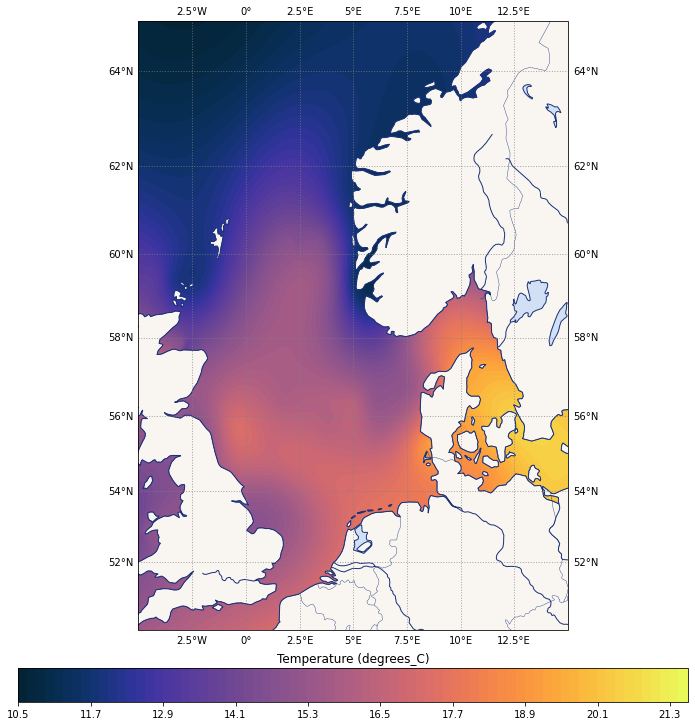

In [7]:
plot_grid(longitude, latitude, grid[0][:,:,0],grid[1][:,:,0],g[:,:,0],cmap=cmocean.cm.thermal, variable_name='Temperature (degrees_C)')

# Plot metadata

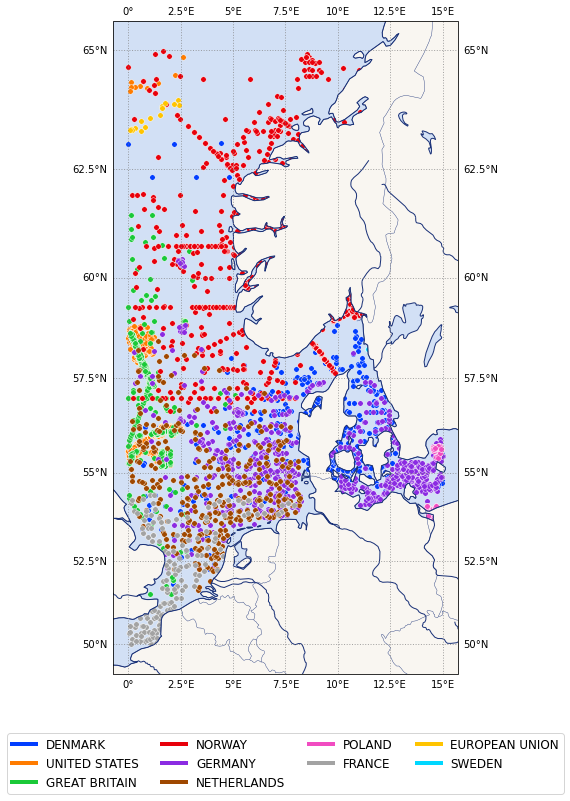

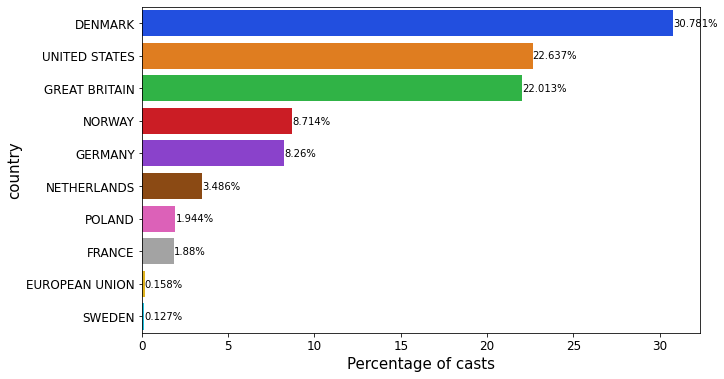

In [19]:
plot_datasets(casts, 'country', latitude, longitude)

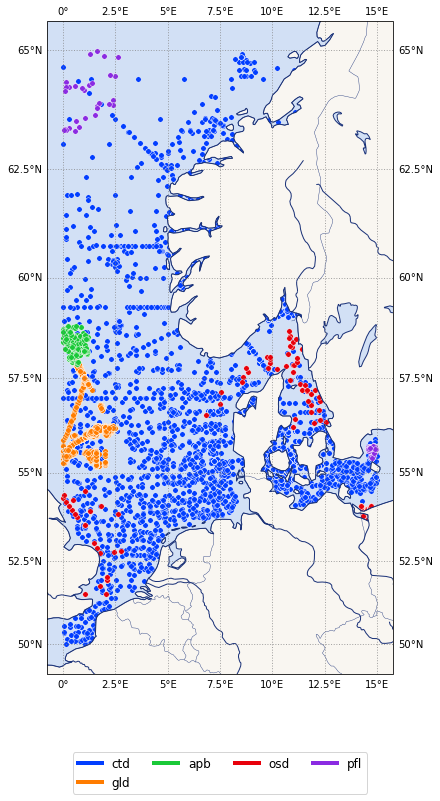

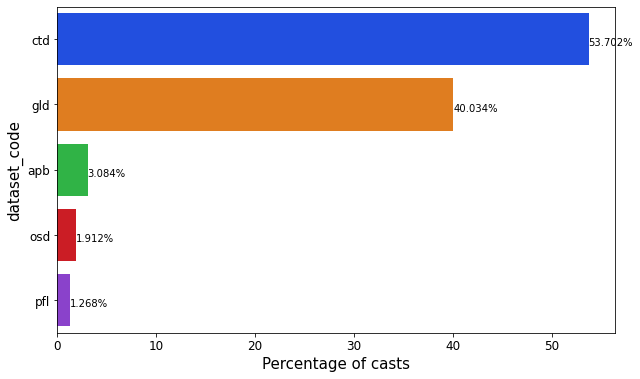

In [20]:
plot_datasets(casts, 'dataset_code', latitude, longitude)